In [1]:
# imports used throughout this notebook
from pyspark.sql import DataFrame, Column, Window
from pyspark.sql.types import IntegerType
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# add homemade helpers
sys.path.insert(1, '../scripts')
import helpers.join_helpers as jh
import helpers.plot_helpers as ph

# path where the data files are stored
DATA_PATH = '../../data'

In [2]:
from pyspark.sql import SparkSession

# Create a spark session (which will run spark jobs)
spark = (
    SparkSession.builder.appName('MAST30034 XT Project 1')
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config('spark.sql.repl.eagerEval.enabled', True) 
    .config('spark.sql.parquet.cacheMetadata', 'true')
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/17 00:17:56 WARN Utils: Your hostname, Polaris resolves to a loopback address: 127.0.1.1; using 172.22.169.117 instead (on interface eth0)
22/08/17 00:17:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/17 00:17:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# read in the aggregated covid data
flu_df = spark.read.parquet(f'{DATA_PATH}/curated/virals/flu/aggregated/cases-by-week')
flu_df.limit(5)

week_year,week_month,week_ending,week_index,timeline,borough,population,tot_cases,tot_pc_cases,tot_p100k_cases
2019,1,2019-01-05,53,1,Bronx,1418207.0,495.0,3.490322639783896E-4,34.903226397838964
2019,10,2019-10-19,94,1,Bronx,1418207.0,6.0,4.230694108828965E-6,0.4230694108828965
2019,10,2019-10-12,93,1,Bronx,1418207.0,12.0,8.46138821765793E-6,0.846138821765793
2019,3,2019-03-23,64,1,Bronx,1418207.0,488.0,3.440964541847558...,34.409645418475584
2019,11,2019-11-23,99,1,Bronx,1418207.0,203.0,1.431384840153799...,14.313848401537998


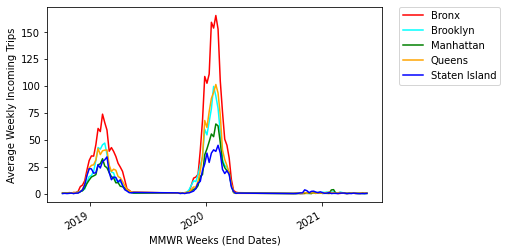

In [4]:
# plot a time-series histogram to show how average weekly trips changes per week
ph.time_series(flu_df.toPandas(), 'tot_p100k_cases',
    ylabel = 'Average Weekly Incoming Trips')